# Plots for differentiation and thermal evolution<a class="anchor" id="top"></a>
[Summary statistics](#stats)
For the whole thermal evolution:
+ [temperature](#temp)
+ [% silicate melted](#silicate)
+ [Rayleigh number](#critical-rayleigh)
+ [Stagnant lid thickness](#d0)
+ [Urey ratio](#Urey)


For differentiation stage:
+ [% iron melted](#iron)

For the thermal evolution stage:
+ [temperatures and heat fluxes](#temp-heat)
+ [inner core size and magnetic Reynolds number](#Rem)
+ [magnetic field strength](#B)
+ [dynamo duration times](#duration)

## Set-up

In [1]:
#import modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import sys
sys.path.append('../')
from load_info import load_run_info, load_run_results

#scale time to Myr
from plotting_constants import Myr, Tml, Tms

Choose run and whether you want to save figure

In [4]:
run=42
save = True# do you want to save your figures?
conduction = False #does the mantle switch to conduction
path = '../Results_combined/Singlevar1/params_8/' #path to files

Load npz files for differentiation

In [5]:
npzfile = np.load(f'{path}run_{run}_diff.npz')
Tdiff = npzfile['Tdiff'] 
iron = npzfile['Xfe']
silicate_d = npzfile['Xsi']
tdiff = npzfile['t_diff']
Ra_d = npzfile['Ra']
Ra_crit_d = npzfile['Ra_crit']
d0_diff = npzfile['d0']

Load npz files for thermal evolution

In [6]:
npzfile = np.load(f'{path}run_{run}.npz')
Tc= npzfile['Tc'] 
Tc_conv = npzfile['Tc_conv']
Tcmb = npzfile['Tcmb']
Tm_mid = npzfile['Tm_mid']
Tm_conv = npzfile['Tm_conv']
Tm_surf = npzfile['Tm_surf'] 
T_profile = npzfile['T_profile']
f = npzfile['f'] 

t = npzfile['t'] #time in s
therm = npzfile['therm'] # magnetic Reynolds number, Bfield and time [Myr] from thermal convection 
comp = npzfile['comp'] # magnetic Reynolds number, Bfield and time [Myr] from compositional convection 
Rem_t = therm[0,:] #Thermal Rem
Rem_c = comp[0,:] #Thermo-compositional Rem (f<f0)
Btherm = therm[1,:]
Bcomp = comp[1,:]
therm_t = therm[2,:]
comp_t = comp[2,:]
Flux = npzfile['Flux']
Ra = npzfile['Ra'] 
RaH = npzfile['RaH'] 
RanoH = npzfile['RanoH'] 
RaRob = npzfile['RaRob']
Racrit = npzfile['Racrit'] 
d0 = npzfile['d0'] 
min_unstable = npzfile['min_unstable'] 
Urey = npzfile['Ur']
Xs = npzfile['Xs']
dl = npzfile['dl']
dx = npzfile['dc']
Fs = Flux[0]
Fcmb = Flux[1]
Fad = Flux[2]
Frad = Flux[3]

Run Info

In [7]:
#r=100e3
#dr=500
#tstart=0.8

In [9]:
r, dr, tstart, dt, viscosity = load_run_info(run,f'{path}auto_params.csv')

Calculate silicate melt content for thermal evolution

In [10]:
nmantle = int((r/dr)/2)
silicate_t = (T_profile[:,nmantle:] - Tms)/(Tml-Tms)

Concatenate shared variables

In [11]:
Tall = np.hstack((Tdiff,np.transpose(T_profile)))
tall = np.append(tdiff,t)
iron_all = np.hstack
Ra_all = np.append(Ra_d,Ra)
Ra_crit_all = np.append(Ra_crit_d,Racrit)
d0_all = np.append(d0_diff,d0)

Scale time, choose whether or not to plot logarithmically

In [12]:
t_plot_all = tall/Myr
t_plot_t = t/Myr
log_time = True # do you want to plot time logarithmically

## Summary statistics <a class="anchor" id="stats"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

In [13]:
results = load_run_results(run,f'{path}run_results.csv')

In [14]:
print(f"Differentiation is at {results.at[0,'diff_time']:.2f} Myr")
print(f"The temperature at differentiation is at {results.at[0,'diff_T']:.2f}K")
print(f"Peak magma ocean temp is {results.at[0,'peakT']:.0f}K at {results.at[0,'tmax']:.2f} Myr")
print(f"Mantle hotter than the core until {results.at[0,'tstrat_remove']:.2f} Myr")
print(f"Erosion of stratification by {results.at[0,'terode']:.2f} Myr") 
print(f"End of mantle convection by {results.at[0,'fcond_t']/Myr:.2f} Myr")
print(f"The maximum thermal Rem is {results.at[0,'max_Rtherm']:.2f} at {results.at[0,'max_Rthermt']:.2f} Myr")
print(f"The maximum compositional Rem is {results.at[0,'max_Rcomp']:.2f} at {results.at[0,'max_Rcompt']:.2f} Myr")
print(f"The maximum thermal field strength is {results.at[0,'max_Btherm']:.2e} T at {results.at[0,'max_Bthermt']:.2f} Myr")
print(f"The maximum compositional field strength is {results.at[0,'max_Bcomp']:.2e} T at {results.at[0,'max_Bcompt']:.2f} Myr")
cond_t = results.at[0,'fcond_t']/Myr
diff_T =results.at[0,'diff_T']

Differentiation is at 1.20 Myr
The temperature at differentiation is at 1516.55K
Peak magma ocean temp is 1524K at 1.30 Myr
Mantle hotter than the core until 1.30 Myr
Erosion of stratification by 1.40 Myr
End of mantle convection by 0.00 Myr


KeyError: 'max_Rtherm'

In [15]:
peak_coreT = np.amax(Tall[:nmantle,:])
loc_max = np.where(Tall[:nmantle,:]==peak_coreT)[1][0] #take the set of time coordinates and first value (they should all be the same)
tcoremax = tall[loc_max]/Myr

In [16]:
print(f'The peak core temperature is {peak_coreT:.0f}K at {tcoremax:.1f}Myr')

The peak core temperature is 1544K at 7.6Myr


## Temperature <a class="anchor" id="temp"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

In [17]:
import matplotlib.colors as mcolors

In [18]:
rplot = np.arange(0,int(r)+dr,int(dr))/1e3

In [19]:
r_unstable=np.array([]) 
for ind in min_unstable:
    r_unstable = np.append(r_unstable,rplot[int(ind)])
rc = r/2

In [20]:
fcond_t = results.at[0,'fcond_t']
lconv_t = results.at[0,'lconv_t']

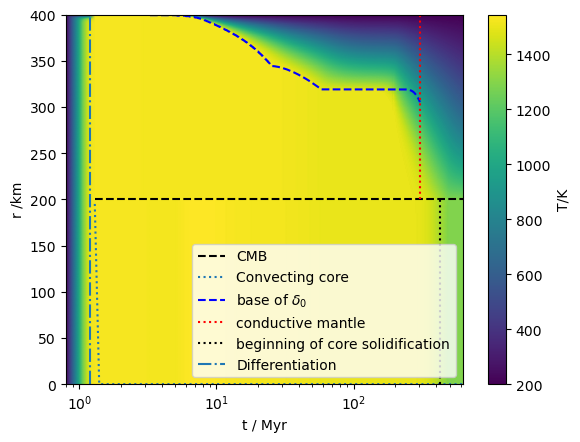

In [22]:
plt.figure()
#plt.pcolormesh(t_plot_all,rplot,Tall-Tall[300,:],shading = 'gouraud',vmin=0) # use same vmin and vmax as other plots to make them comparable
plt.pcolormesh(t_plot_all,rplot,Tall,shading = 'gouraud')
plt.hlines(rc/1e3,min(t/Myr),max(tall/Myr),linestyle='--',color='black',label='CMB')
#plt.fill_betweenx([0,rc/5e3],t[np.where(Fcmb>Fad)[0]][0]/Myr,t[np.where(Fcmb>Fad)[0]][-1]/Myr,alpha=0,hatch='/',label='$F_{CMB}>F_{ad}$')
plt.plot(t/Myr,r_unstable,linestyle='dotted',label='Convecting core')
plt.plot(t[t/Myr<=fcond_t]/Myr,(r-d0[t/Myr<=fcond_t])/1e3,linestyle='dashed',label='base of $\delta_0$',color='blue')
if np.any(t/Myr<fcond_t):
    plt.vlines(t[t/Myr<=fcond_t][-1]/Myr,r/1e3,rc/1e3,linestyle='dotted',label='conductive mantle',color='red')
plt.vlines(t[f<0.999000][0]/Myr,0/1e3,rc/1e3,linestyle='dotted',label='beginning of core solidification',color='black')
plt.ylabel('r /km')
plt.xlabel('t / Myr')
plt.ylim([0,r/1e3])
#plt.xlim([0.8,1.1])
#plt.ylim([290,r/1e3])
plt.vlines(tdiff[-1]/Myr,0,r/1e3,linestyle='-.',label='Differentiation')
plt.colorbar(label='T/K')
#plt.title(f'Run {run} \n differentiation melt fraction {(diff_T-1400)/400:.2f}')
plt.xscale('log')
plt.legend(loc='lower right')
#if save == True:
#plt.savefig(f'../Plots/Xs_r_tests/Tall_run{run}.png')

## Melted silicate content <a class="anchor" id="silicate"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

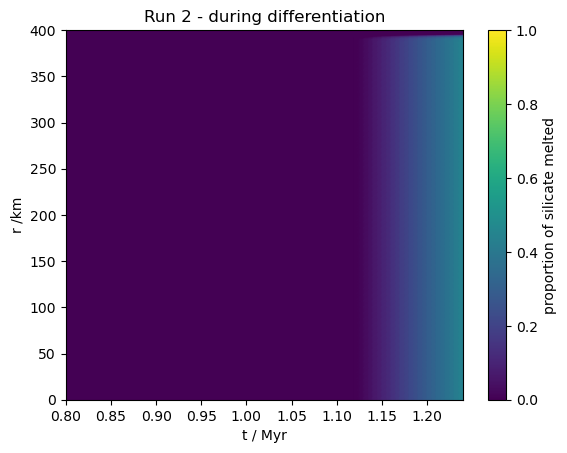

In [19]:
plt.figure()
plt.pcolormesh(tdiff/Myr, rplot,silicate_d,shading = 'gouraud',vmin=0,vmax=1) # use same vmin and vmax as other plots to make them comparable
#plt.yscale('log')
plt.ylabel('r /km')
plt.xlabel('t / Myr')
#plt.ylim([0,400])
plt.title(f'Run {run} - during differentiation')
plt.colorbar(label='proportion of silicate melted')
if save ==True:
    plt.savefig(f'Plots/si_diff_run_{run}.png')

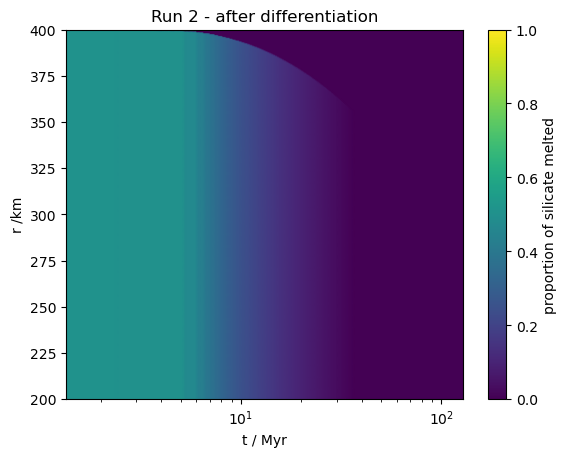

In [20]:
rmantle = np.arange(int(r/2),int(r+dr),int(dr))/1e3
plt.figure()
plt.pcolormesh(t/Myr, rmantle,np.transpose(silicate_t),shading = 'gouraud',vmin=0, vmax=1) # use same vmin and vmax as other plots to make them comparable
plt.xscale('log')
plt.ylabel('r /km')
plt.xlabel('t / Myr')
#plt.ylim([0,400])
plt.title(f'Run {run} - after differentiation')
plt.colorbar(label='proportion of silicate melted')
if save ==True:
    plt.savefig(f'Plots/si_therm_run_{run}.png')

## Rayleigh number<a class="anchor" id="critical-rayleigh"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

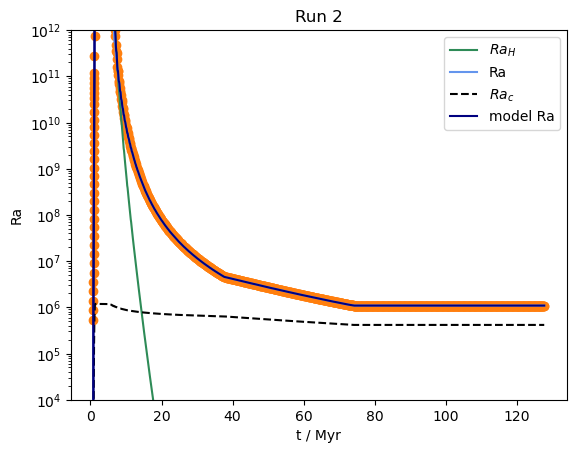

In [21]:
plt.figure()
plt.plot(tdiff/Myr,Ra_d,color='navy')
plt.plot(t/Myr,RaH,label='$Ra_H$',color='seagreen')
plt.plot(t/Myr,RanoH,label='Ra',color='cornflowerblue')
plt.plot(t_plot_all,Ra_crit_all,label='$Ra_c$',linestyle='dashed',color='black') 
plt.plot(t_plot_all,Ra_all,label='model Ra',color='navy') 
plt.scatter(t_plot_all[Ra_all/Ra_crit_all<0.5],Ra_all[Ra_all/Ra_crit_all<0.5])
plt.scatter(t_plot_all[Ra_all/Ra_crit_all>1.1],Ra_all[Ra_all/Ra_crit_all>1.1])
plt.ylim(bottom=1e0)#,top=1e8)
#plt.xlim([min(tall/Myr),5])
#plt.vlines(tdiff[-1]/Myr,1e3,1e18,linestyle='dotted',color='blue',label='differentiation')
#if conduction == True:
    #plt.vlines(cond_t,1e3,1e18,linestyle='dashed',color='k',label='conduction')
    #plt.xlim([min(tall/Myr),cond_t])
plt.ylabel('Ra')
#plt.xscale('log')
plt.yscale('log')
plt.xlabel('t / Myr')
#plt.xlim([0,100])
plt.ylim([1e4,1e12])
plt.title(f'Run {run}')
plt.legend()
#if save == True:
#plt.savefig(f'../Plots/Ra_run{run}.png')

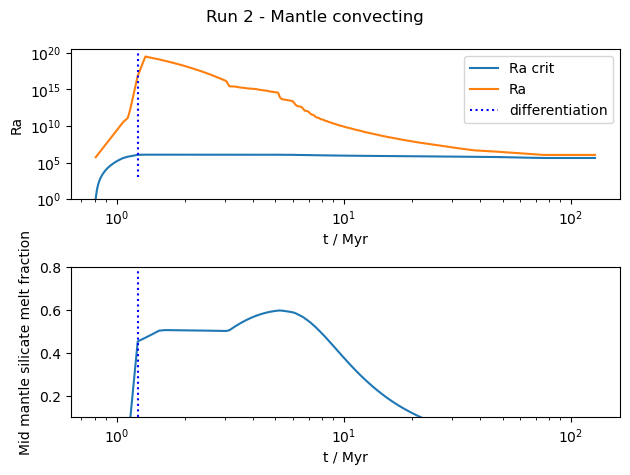

In [22]:
plt.figure(tight_layout=True)
plt.subplot(2,1,1)
plt.semilogy(t_plot_all[d0_all<r],Ra_crit_all[d0_all<r],label='Ra crit') 
plt.semilogy(t_plot_all[d0_all<r],Ra_all[d0_all<r],label='Ra') 
plt.ylim(bottom=1e0)
#plt.xlim([min(tall/Myr),30])
plt.vlines(tdiff[-1]/Myr,1e3,1e25,linestyle='dotted',color='blue',label='differentiation')
plt.ylabel('Ra')
plt.xscale('log')
plt.xlabel('t / Myr')
plt.legend()
plt.subplot(2,1,2)
plt.plot(t_plot_all[d0_all<r],(Tall[int(nmantle/2),d0_all<r]-1400)/400)
plt.vlines(tdiff[-1]/Myr,0,0.8,linestyle='dotted',color='blue',label='differentiation')
#plt.xlim([min(tall/Myr),30])
plt.ylim([0.1,0.8])
plt.xscale('log')
plt.ylabel('Mid mantle silicate melt fraction')
plt.suptitle(f'Run {run} - Mantle convecting')
plt.xlabel('t / Myr')
if save == True:
    plt.savefig(f'Plots/Ra_phi_comp_run{run}.png',dpi=300)

## Stagnant lid thickness <a class="anchor" id="d0"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

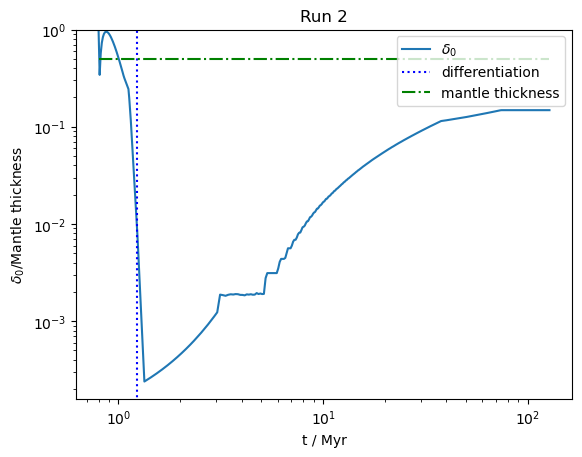

In [23]:
plt.figure()
plt.semilogy(tall/Myr,d0_all/r,label='$\delta_0$') 
plt.ylim(top=1e0)
#plt.xlim([min(tall/Myr),25])
plt.vlines(tdiff[-1]/Myr,0,1,linestyle='dotted',color='blue',label='differentiation')
plt.hlines(0.5,min(tall/Myr),max(tall/Myr),linestyle='-.',color='green',label='mantle thickness')
if conduction == True:
    plt.vlines(cond_t,0,1,linestyle='dashed',color='k',label='conduction')
plt.ylabel('$\delta_0$/Mantle thickness')
plt.xlabel('t / Myr')
plt.xscale('log')
plt.title(f'Run {run}')
plt.legend()
if save == True:
    plt.savefig(f'Plots/d0_run{run}.png')

### CMB boundary layer thickness

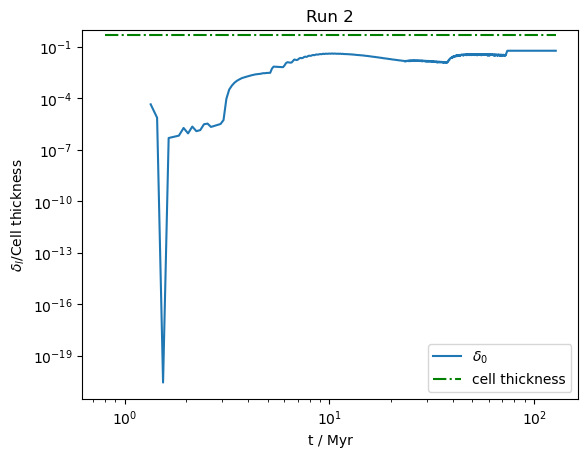

In [24]:
plt.figure()
plt.semilogy(t_plot_t,dl/dr,label='$\delta_0$') 
plt.ylim(top=1e0)
#plt.xlim([min(tall/Myr),25])
plt.hlines(0.5,min(tall/Myr),max(tall/Myr),linestyle='-.',color='green',label='cell thickness')
if conduction == True:
    plt.vlines(cond_t,0,1,linestyle='dashed',color='k',label='conduction')
plt.ylabel('$\delta_l$/Cell thickness')
plt.xlabel('t / Myr')
plt.xscale('log')
plt.title(f'Run {run}')
plt.legend()
if save == True:
    plt.savefig(f'Plots/dl_run{run}.png')

## Urey ratio  <a class="anchor" id="Urey"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

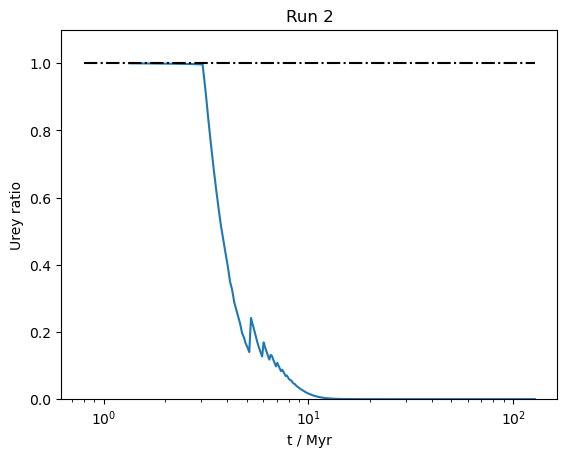

In [25]:
plt.figure()
plt.plot(t_plot_t,Urey) 
#plt.xlim([min(tall/Myr),25])
plt.hlines(1,min(tall/Myr),max(tall/Myr),linestyle='-.',color='black')
if conduction == True:
    plt.vlines(cond_t,0,1,linestyle='dashed',color='k',label='conduction')
    plt.legend()
plt.ylabel('Urey ratio')
plt.xlabel('t / Myr')
plt.xscale('log')
plt.ylim([0,1.1])
plt.title(f'Run {run}')
if save == True:
    plt.savefig(f'Plots/Urey{run}.png')

## Melted iron content during differentiation<a class="anchor" id="iron"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

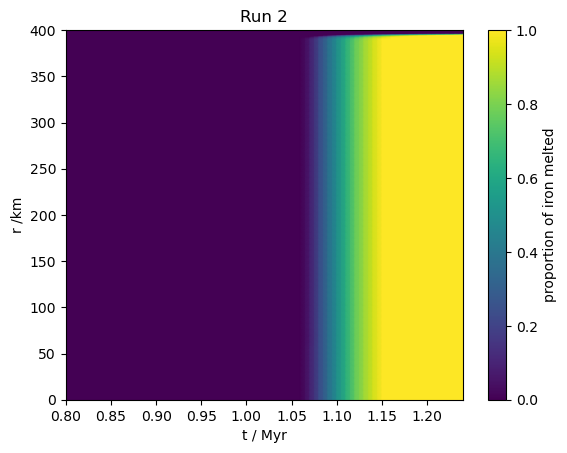

In [26]:
plt.figure()
plt.pcolormesh(tdiff/Myr, rplot,iron,shading = 'gouraud')#,vmin=0,vmax=1) # use same vmin and vmax as other plots to make them comparable
#plt.yscale('log')
plt.ylabel('r /km')
plt.xlabel('t / Myr')
#plt.ylim([290,300])
plt.title(f'Run {run}')
plt.colorbar(label='proportion of iron melted')
if save ==True:
    plt.savefig(f'Plots/fe_diff_run_{run}.png')

# Temperature and Flux Plot <a class="anchor" id="temp-heat"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

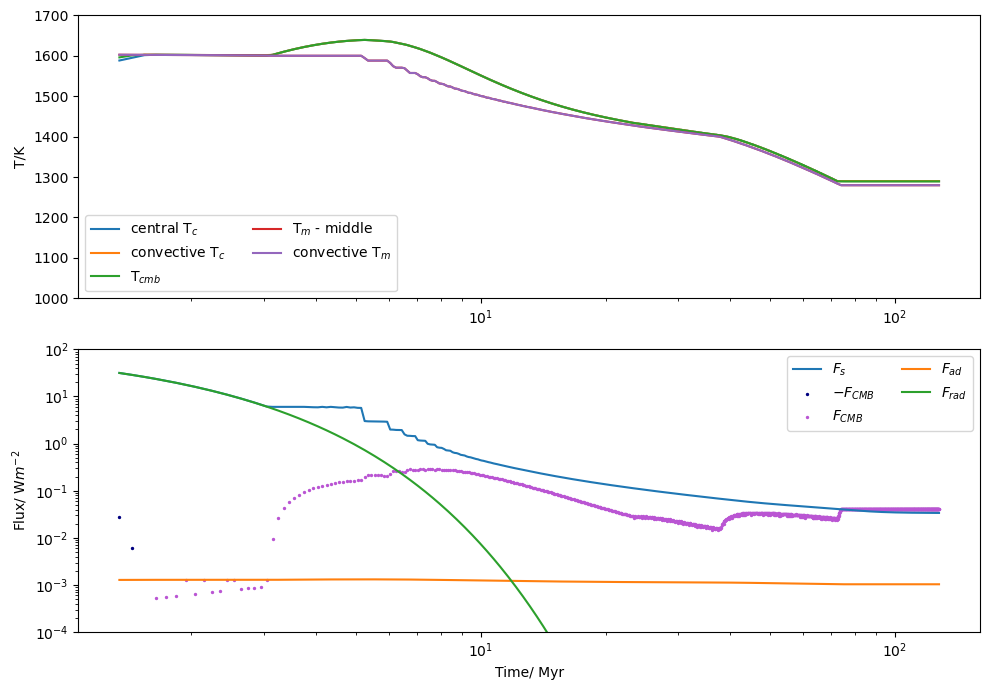

In [27]:
plt.figure(tight_layout=True,figsize=[10,7])
#plt.suptitle(f'Thermal evolution of a {r/1e3:.0f}km asteroid \n run {run} viscosity {viscosity}')

xmin=tstart

#temperatures as function of time
plt.subplot(2,1,1)
if log_time == True:
    plt.semilogx(t_plot_t,Tc,label='central T$_c$')
    plt.semilogx(t_plot_t[Tc_conv!=0],Tc_conv[Tc_conv!=0],label='convective T$_c$')
    plt.semilogx(t_plot_t,Tcmb,label='T$_{cmb}$')
    plt.semilogx(t_plot_t,Tm_mid,label='T$_m$ - middle')
    plt.semilogx(t_plot_t[Tm_conv!=0],Tm_conv[Tm_conv!=0],label='convective T$_m$')
    #plt.semilogx(t_plot_t,Tm_conv,label='convective T$_m$')
    #plt.semilogx(t_plot_t,Tm_surf,label='T$_m$ - surface')
else:
    plt.plot(t_plot_t,Tc,label='central T$_c$')
    plt.plot(t_plot_t[Tc_conv!=0],Tc_conv[Tc_conv!=0],label='convective T$_c$')
    plt.plot(t_plot_t,Tcmb,label='T$_{cmb}$')
    plt.plot(t_plot_t,Tm_mid,label='T$_m$ - middle')
    plt.plot(t_plot_t[Tm_conv!=0],Tm_conv[Tm_conv!=0],label='convective T$_m$')
    #plt.plot(t_plot_t,Tm_surf,label='T$_m$ - surface')
if conduction == True:
    plt.vlines(cond_t,ymin=min(Tm_surf),ymax=1600,color='black',linestyle='--',label='conduction')
plt.ylim([1000,1700]) #use these limits when comparing runs
plt.ylabel('T/K')
plt.legend(loc='lower left', ncol= 2)

#fluxes as function of time
plt.subplot(2,1,2)

Fcmb_neg = Fcmb[Fcmb<0]
Fcmb_pos = Fcmb[Fcmb>0]
if log_time == True:
    plt.loglog(t_plot_t,Fs,label='$F_s$')
    plt.scatter(t_plot_t[Fcmb<0],abs(Fcmb_neg),label='$-F_{CMB}$',color='navy',s=2)
    plt.scatter(t_plot_t[Fcmb>0],Fcmb_pos,label='$F_{CMB}$',color='mediumorchid',s=2)
    plt.loglog(t_plot_t,Fad,label='$F_{ad}$')
    plt.loglog(t_plot_t,Frad,label='$F_{rad}$')
else:
    plt.semilogy(t_plot_t,Fs,label='$F_s$')
    plt.scatter(t_plot_t[Fcmb<0],abs(Fcmb_neg),label='$-F_{CMB}$',color='navy',s=2)
    plt.scatter(t_plot_t[Fcmb>0],Fcmb_pos,label='$F_{CMB}$',color='mediumorchid',s=2)
    plt.semilogy(t_plot_t,Fad,label='$F_{ad}$')
    plt.semilogy(t_plot_t,Frad,label='$F_{rad}$')
plt.xlabel('Time/ Myr')

plt.ylim([1e-4,1e2])   #use these limits when comparing runs
plt.ylabel('Flux/ W$m^{-2}$')
plt.legend(loc='upper right',ncol=2)

if save == True:
    plt.savefig('../Plots/Xs_r_tests/run_{}_Tflux.png'.format(run),dpi=450)


## Magnetic Reynolds number and inner core size <a class="anchor" id="Rem"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

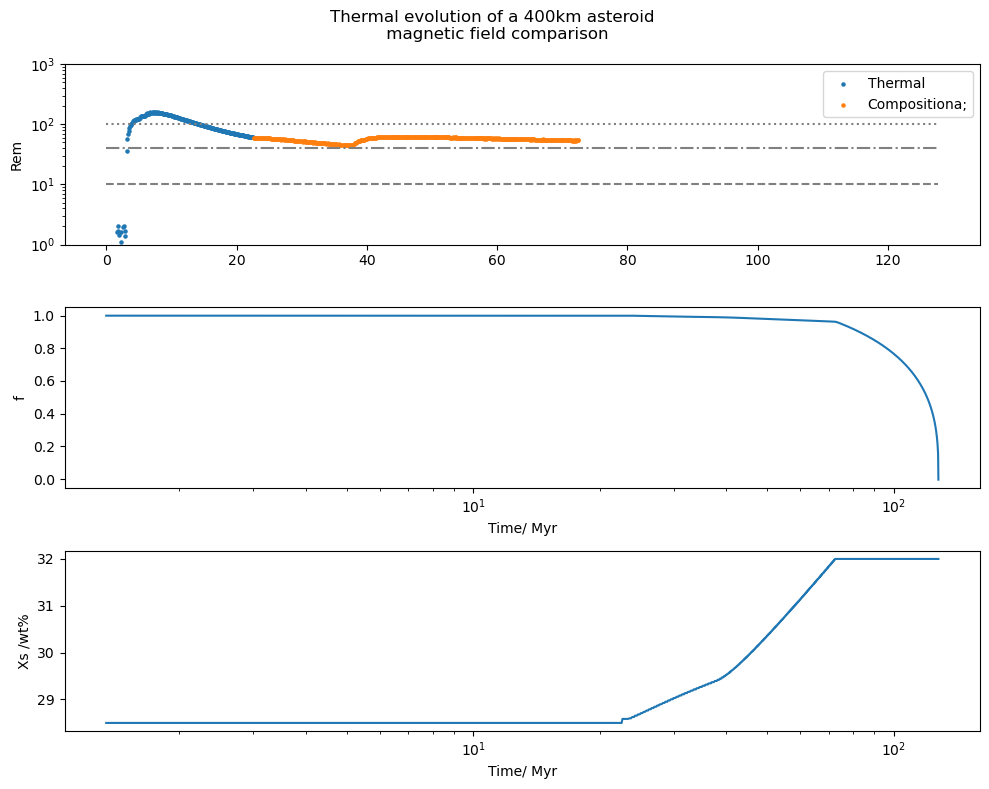

In [28]:
plt.figure(tight_layout=True,figsize=[10,8])
plt.suptitle(f'Thermal evolution of a {r/1e3:.0f}km asteroid \n magnetic field comparison')
plt.subplot(3,1,1)
plt.scatter(therm_t,Rem_t,label='Thermal',s=5)
plt.scatter(comp_t,Rem_c,label='Compositiona;',s=5)
plt.hlines(10,xmin=0,xmax=t_plot_t[-1],color='gray',linestyle='--')
plt.hlines(40,xmin=0,xmax=t_plot_t[-1],color='gray',linestyle='-.')
plt.hlines(100,xmin=0,xmax=t_plot_t[-1],color='gray',linestyle='dotted')
#plt.xlabel('Time/Myr')
plt.ylabel('Rem')
plt.legend()
plt.yscale('log')
plt.ylim([1,1000])
#plt.xscale('log')
#plt.xlim([100,200])

plt.subplot(3,1,2)
plt.plot(t_plot_t,f,label='f')
plt.xscale('log')
plt.xlabel('Time/ Myr')
plt.ylabel('f')

plt.subplot(3,1,3)
plt.plot(t_plot_t,Xs,label='Xs')
plt.xscale('log')
plt.xlabel('Time/ Myr')
plt.ylabel('Xs /wt%')


if save == True:
    plt.savefig('../Plots/run_{}_Remf.png'.format(run),dpi=450)

# Magnetic Field Strength <a class="anchor" id="B"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

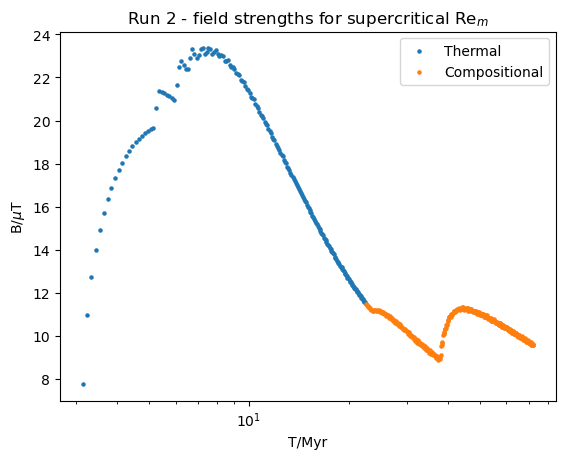

In [30]:
threshold = 10 #critical Rem
plt.figure()
plt.scatter(therm_t[Rem_t>threshold],Btherm[Rem_t>threshold]/1e-6,label='Thermal',s=5)
plt.scatter(comp_t[Rem_c>threshold],Bcomp[Rem_c>threshold]/1e-6,label='Compositional',s=5)
plt.legend()
plt.xlabel('T/Myr')
plt.ylabel('B/$\mu$T')
plt.xscale('log')
plt.title(f'Run {run} - field strengths for supercritical Re$_m$')
#plt.ylim([0,10])
if save ==True:
    plt.savefig(f'../Plots/Bfield_{run}.png')

## Dynamo duration <a class="anchor" id="duration"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

In [31]:
from duration_calc import on_off_load

In [32]:
for name, label in zip([f'{path}therm_onoff.csv',f'{path}comp_onoff.csv'],['thermal','compositional']):
    onoff = on_off_load(name,run)
    for i in range(len(onoff)):
        start = onoff.at[i,'start'] 
        stop = onoff.at[i,'end']
        duration = onoff.at[i,'duration']
        print(f'The {label} dynamo starts at {start:.2f} Myr, stops at {stop:.2f} Myr and lasts {duration:.2f} Myr')
        i = i+1

The thermal dynamo starts at 3.15 Myr, stops at 75.25 Myr and lasts 72.10 Myr
The thermal dynamo starts at 315.85 Myr, stops at 403.14 Myr and lasts 87.30 Myr
The thermal dynamo starts at 3.13 Myr, stops at 16.43 Myr and lasts 13.30 Myr
The thermal dynamo starts at 3.14 Myr, stops at 22.54 Myr and lasts 19.40 Myr
The thermal dynamo starts at 3.14 Myr, stops at 22.54 Myr and lasts 19.40 Myr
The compositional dynamo starts at 403.24 Myr, stops at 518.54 Myr and lasts 115.30 Myr
The compositional dynamo starts at 16.53 Myr, stops at 39.83 Myr and lasts 23.30 Myr
The compositional dynamo starts at 22.64 Myr, stops at 72.44 Myr and lasts 49.80 Myr
The compositional dynamo starts at 22.64 Myr, stops at 72.44 Myr and lasts 49.80 Myr
